<a href="https://colab.research.google.com/github/2303A52096/AIML_2303A52096/blob/main/AIML_LAB_EXAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Implement SVM with a linear kernel on a binary classification dataset. and**

**2.Evaluate the models performance using accuracy and confusion matrix ***

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/whether forcast.csv')  # Load your data into the 'data' variable


In [ ]:
# Encode the target variable (Rain) to binary labels
label_encoder = LabelEncoder()
data['Rain'] = label_encoder.fit_transform(data['Rain'])  # 'rain' -> 1, 'no rain' -> 0

# Split the dataset into features (X) and target (y)
X = data.drop(columns=['Rain'])
y = data['Rain']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM with a linear kernel
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_linear = svm_linear.predict(X_test_scaled)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear)

# Display results for linear kernel
accuracy_linear, conf_matrix_linear

(0.9213333333333333,
 array([[632,  24],
        [ 35,  59]]))

**3.Visualize the decision boundary of the linear kernel SVM.**

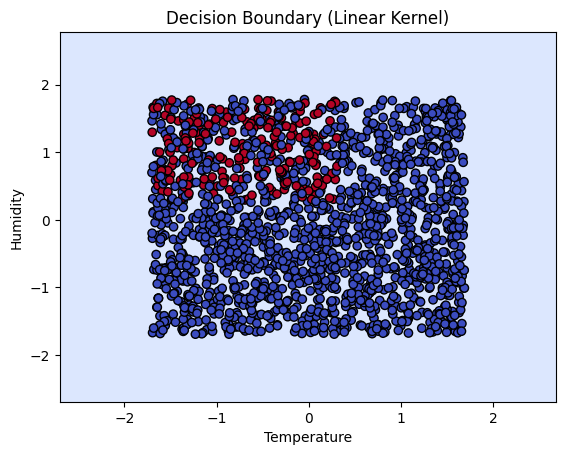

In [ ]:


# Select two features for visualization (e.g., 'Temperature' and 'Humidity')
feature_1 = 'Temperature'
feature_2 = 'Humidity'

# Prepare data with selected features
X_2D = data[[feature_1, feature_2]]
X_train_2D, X_test_2D, y_train_2D, y_test_2D = train_test_split(
    X_2D, y, test_size=0.3, random_state=42, stratify=y
)

# Scale the selected features
scaler_2D = StandardScaler()
X_train_scaled_2D = scaler_2D.fit_transform(X_train_2D)
X_test_scaled_2D = scaler_2D.transform(X_test_2D)

# Train SVM with linear kernel using two features
svm_linear_2D = SVC(kernel='linear', random_state=42)
svm_linear_2D.fit(X_train_scaled_2D, y_train_2D)

# Plot decision boundary
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
    plt.title(title)
    plt.xlabel(feature_1)
    plt.ylabel(feature_2)
    plt.show()

# Visualize decision boundary
plot_decision_boundary(svm_linear_2D, X_train_scaled_2D, y_train_2D.values, "Decision Boundary (Linear Kernel)")


**4.Use a non-linear kernel (e.g., RBF) and evaluate the model’s performance.**

In [ ]:
# Train SVM with an RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)  # Changed kernel to 'rbf'
svm_rbf.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred_rbf = svm_rbf.predict(X_test_scaled)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
conf_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)

# Display results for RBF kernel
print("Accuracy (RBF Kernel):", accuracy_rbf)
print("Confusion Matrix (RBF Kernel):\n", conf_matrix_rbf)

Accuracy (RBF Kernel): 0.968
Confusion Matrix (RBF Kernel):
 [[645  11]
 [ 13  81]]


**5.Compare the SVM model’s performance with and without feature scaling.**

 1. Model without Feature Scaling:

In [ ]:
# 1. Model without Feature Scaling:
svm_no_scaling = SVC(kernel='rbf', random_state=42)
svm_no_scaling.fit(X_train, y_train)  # Train on unscaled data
y_pred_no_scaling = svm_no_scaling.predict(X_test)
accuracy_no_scaling = accuracy_score(y_test, y_pred_no_scaling)

 2. Model with Feature Scaling:

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm_scaling = SVC(kernel='rbf', random_state=42)
svm_scaling.fit(X_train_scaled, y_train)  # Train on scaled data
y_pred_scaling = svm_scaling.predict(X_test_scaled)
accuracy_scaling = accuracy_score(y_test, y_pred_scaling)


 Compare results

In [ ]:
print("Accuracy without Scaling:", accuracy_no_scaling)
print("Accuracy with Scaling:", accuracy_scaling)

Accuracy without Scaling: 0.8746666666666667
Accuracy with Scaling: 0.968
